#### ML Modeling

In [1]:
import pandas as pd

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from utils.plt_setting import plt_settings
from utils.evaluation import regression_evaluation, f_importances, plot_actual_pred
from utils.data_manager import read_data

plt_settings()

In [2]:
df_X = read_data('2a-sub-scaled-X1')
df_y = read_data('2a-sub-y1')

In [3]:
training_columns = df_X.columns

X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.2)
    
X_test_copy = X_test.copy()

In [4]:
SEED = 123
ml_models = {
    'LIN': LinearRegression(),
    'LASSO': Lasso(),
    'RIDGE': Ridge(),
    'KNR': KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=SEED),
    'GBR': GradientBoostingRegressor(),
    'EN': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=SEED),
    'XGR': XGBRegressor(eta=0.01, n_estimators=100, n_jobs=-1),
}

In [5]:
def diff_ytest_pred(model_key, test, pred):
    test = test['total_cons_cost'].values.tolist()
    pred = pred.tolist()
    if isinstance(pred[0], list):
        pred = [item for sub in pred for item in sub]
    max_test = max(test)
    loop_size = len(test)
    result_mape = []
    result_max_mape = []
    for idx in range(loop_size):
        new_mape = abs((test[idx] - pred[idx])/test[idx])*100
        new_max_mape = abs((test[idx] - pred[idx])/(test[idx]+max_test))*100
        result_mape.append(new_mape)
        result_max_mape.append(new_max_mape)
    X_test_copy[f'{model_key}_mape'] = result_mape
    X_test_copy[f'{model_key}_max_mape'] = result_max_mape

In [6]:
def model_fit_and_evaluation(model_key, display_start=0, display_size=50):
    model = ml_models[model_key]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Evaluation: {model_key}')
    evaluation_value = regression_evaluation(y_test, predictions)
    evaluation_values.append(evaluation_value)
    model_names.append(model_key)
    diff_ytest_pred(model_key, y_test, predictions)
    try:
        f_importances(model, training_columns, model_key)
    except AttributeError as e:
        print(f'`{model_key}` object has no attribute `feature_importances_`')
    plot_actual_pred(
        y_test[display_start:display_start+display_size],
        predictions[display_start:display_start+display_size],
        model_key
    )

Evaluation: LIN
R2_SCORE: 0.415187, MAPE: 20.174587, MSE: 2079116525565.960205, RMSE: 1441914.188004, MAE: 721337.926146
`LIN` object has no attribute `feature_importances_`


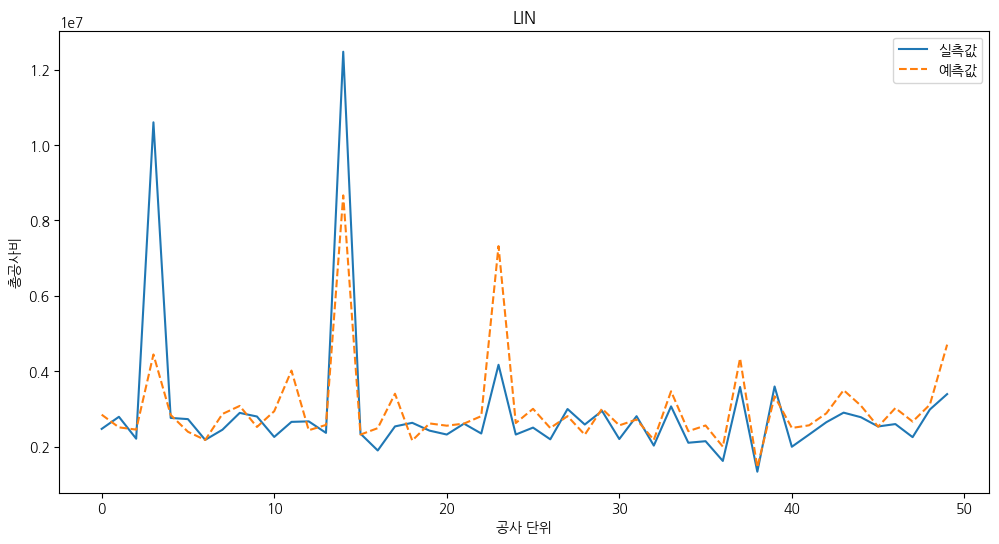

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.497e+15, tolerance: 2.779e+12
  model = cd_fast.enet_coordinate_descent(


Evaluation: LASSO
R2_SCORE: 0.415195, MAPE: 20.176785, MSE: 2079088502582.363281, RMSE: 1441904.470685, MAE: 721402.476579
`LASSO` object has no attribute `feature_importances_`


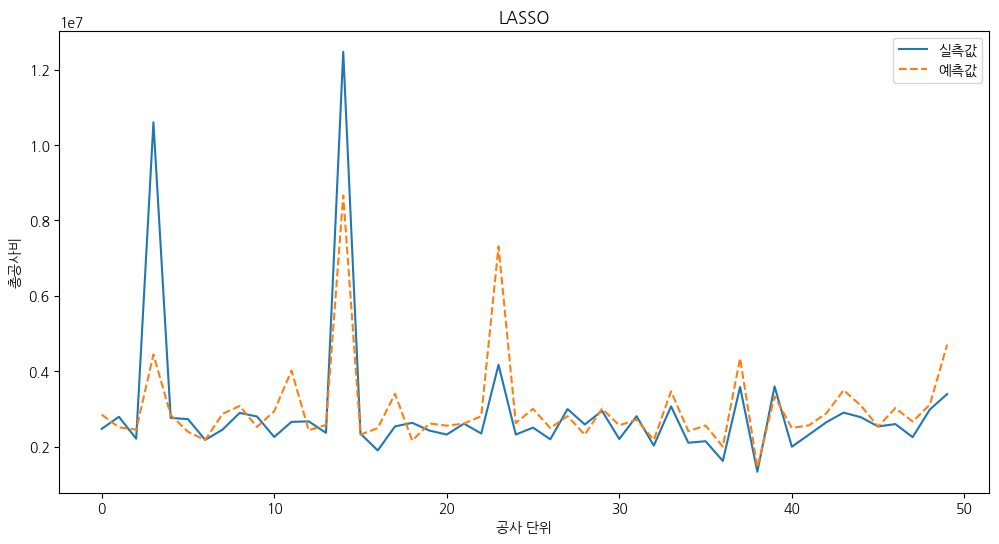

Evaluation: RIDGE
R2_SCORE: 0.415197, MAPE: 20.176418, MSE: 2079079658643.732422, RMSE: 1441901.403926, MAE: 721391.784179
`RIDGE` object has no attribute `feature_importances_`


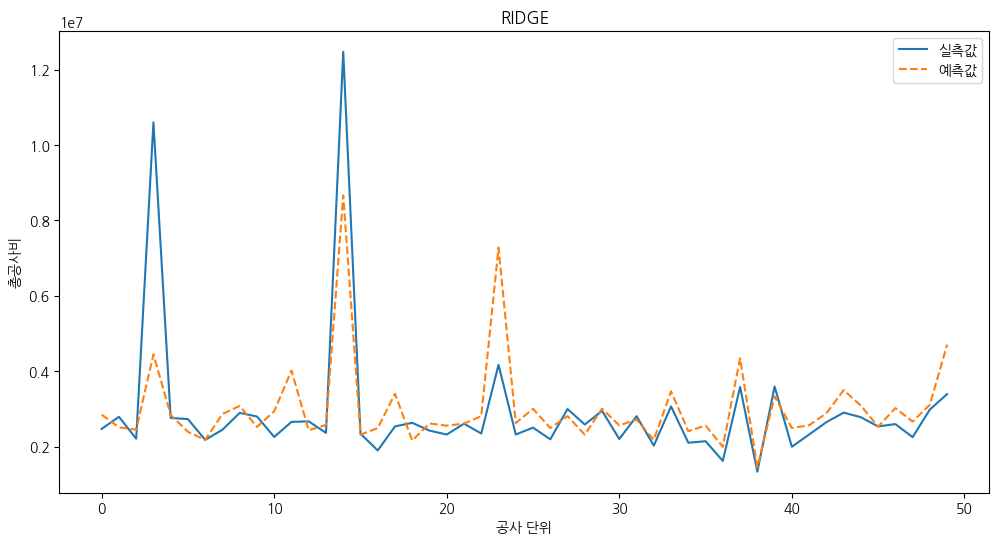

Evaluation: KNR
R2_SCORE: 0.281110, MAPE: 20.196099, MSE: 2555784482674.255371, RMSE: 1598682.108073, MAE: 758314.664630
`KNR` object has no attribute `feature_importances_`


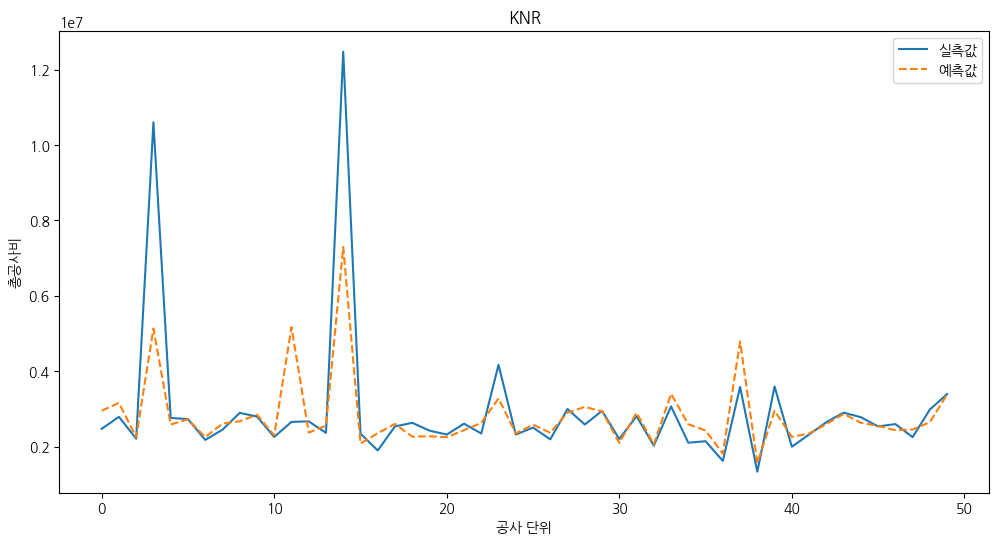

Evaluation: DTR
R2_SCORE: -0.540820, MAPE: 27.081146, MSE: 5477893113822.446289, RMSE: 2340489.930297, MAE: 984882.113374


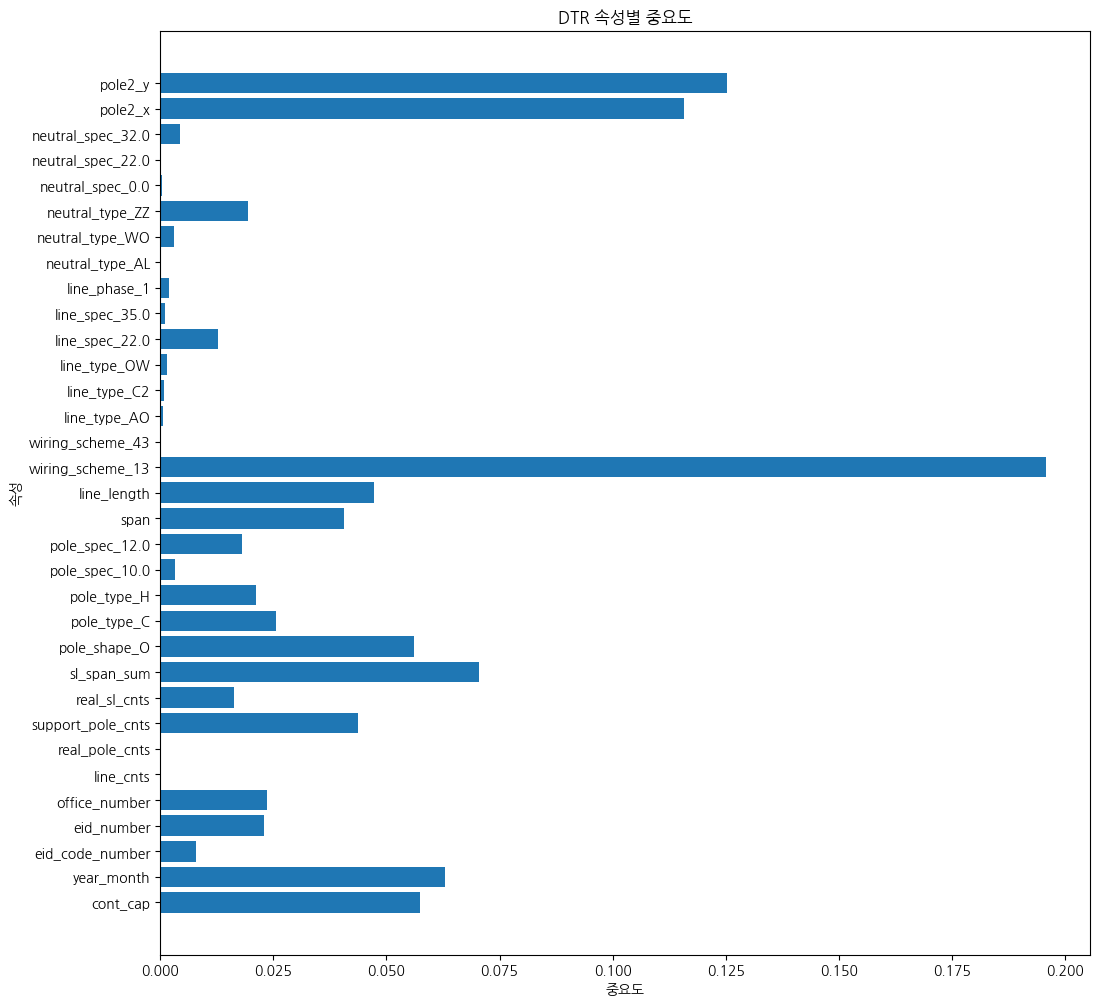

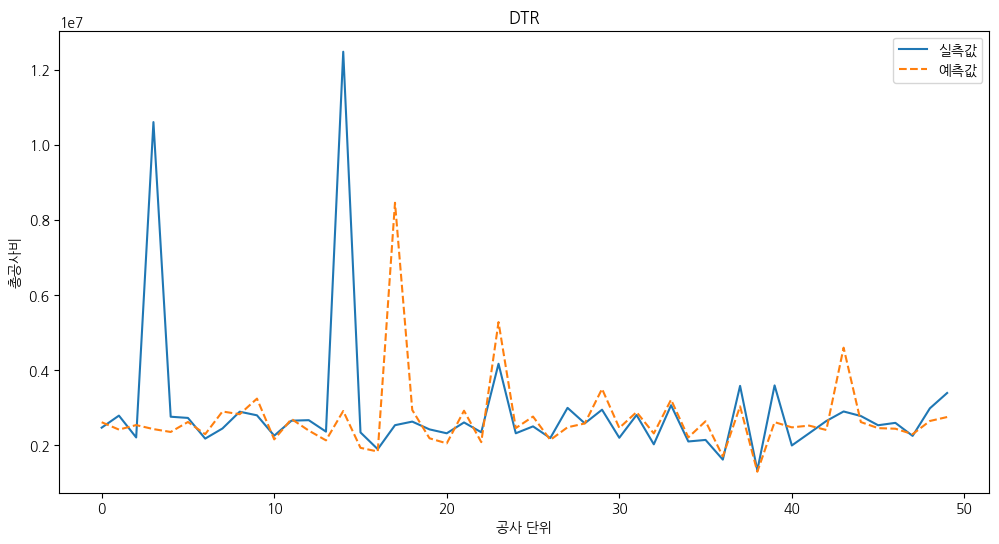

/tmp/ipykernel_7672/3261526636.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Evaluation: RFR
R2_SCORE: 0.322867, MAPE: 19.297112, MSE: 2407328212007.201172, RMSE: 1551556.706024, MAE: 718946.530659


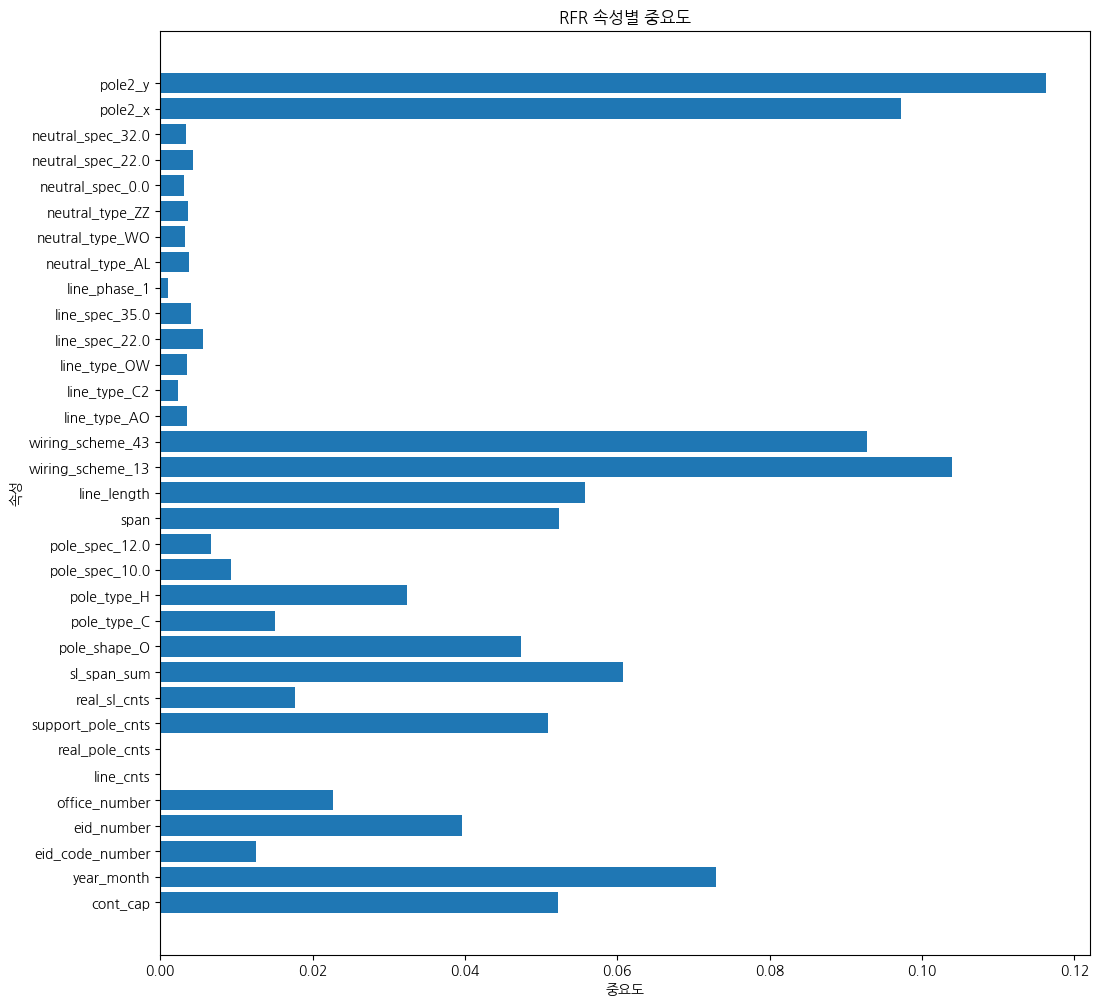

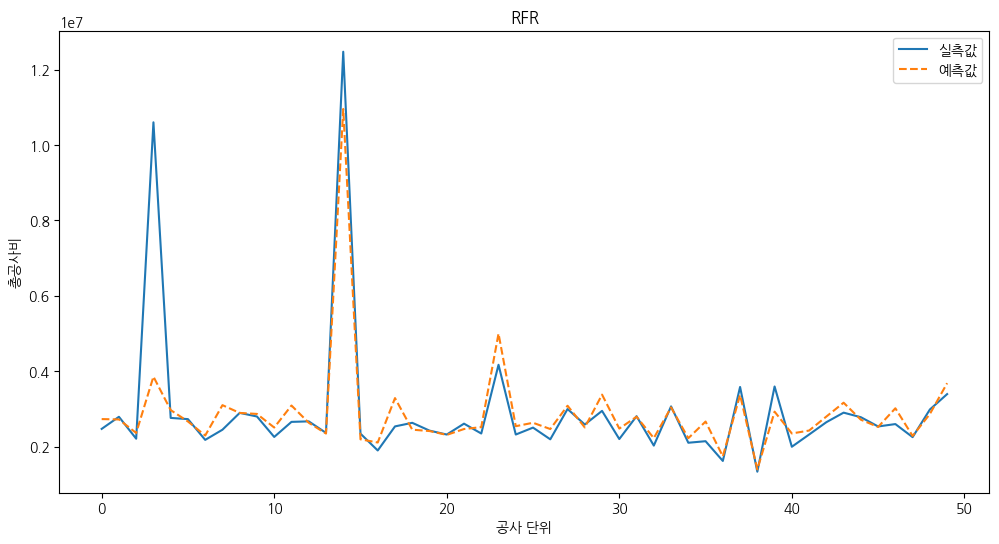

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluation: GBR
R2_SCORE: 0.401693, MAPE: 18.975058, MSE: 2127089399138.125244, RMSE: 1458454.455627, MAE: 694617.392647


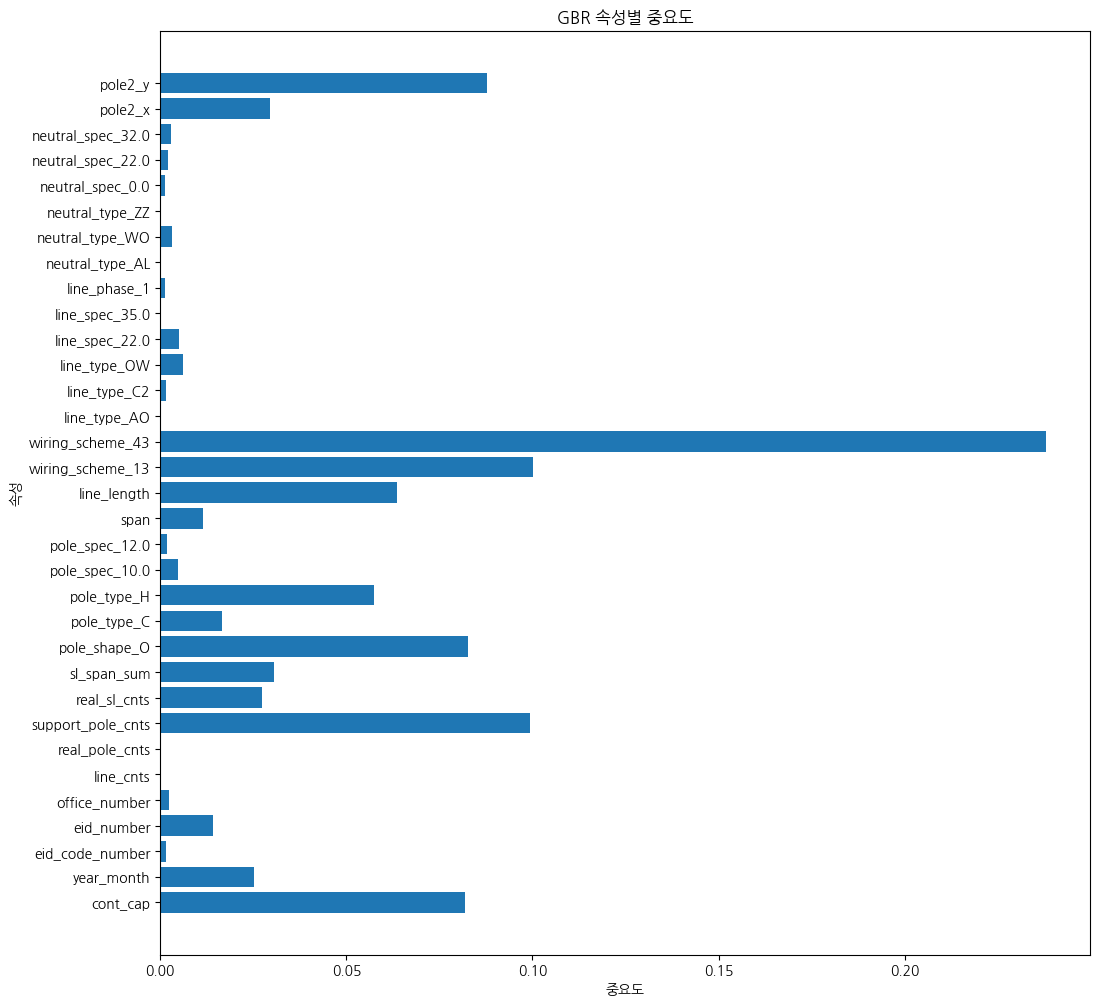

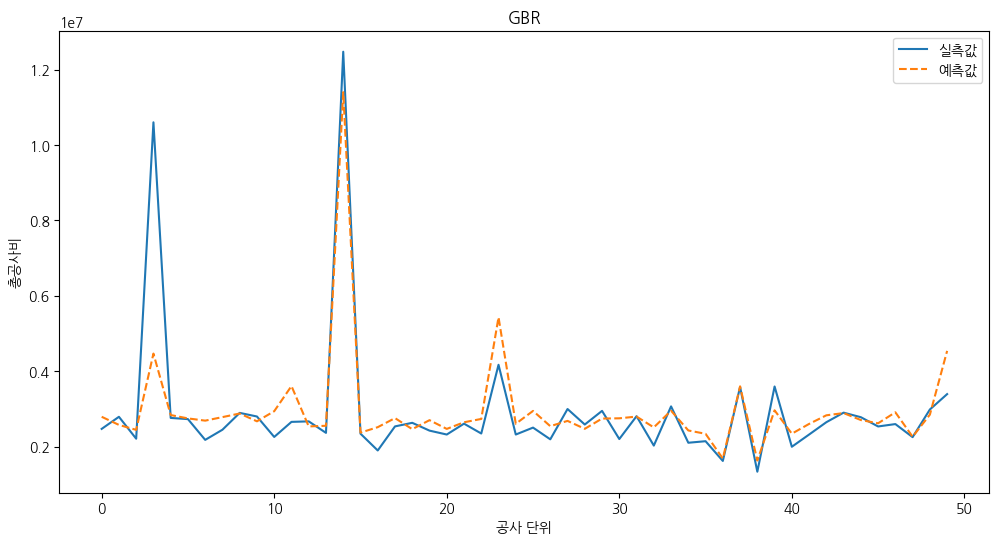

Evaluation: EN
R2_SCORE: 0.406897, MAPE: 20.181165, MSE: 2108587127900.008057, RMSE: 1452097.492560, MAE: 718869.012354
`EN` object has no attribute `feature_importances_`


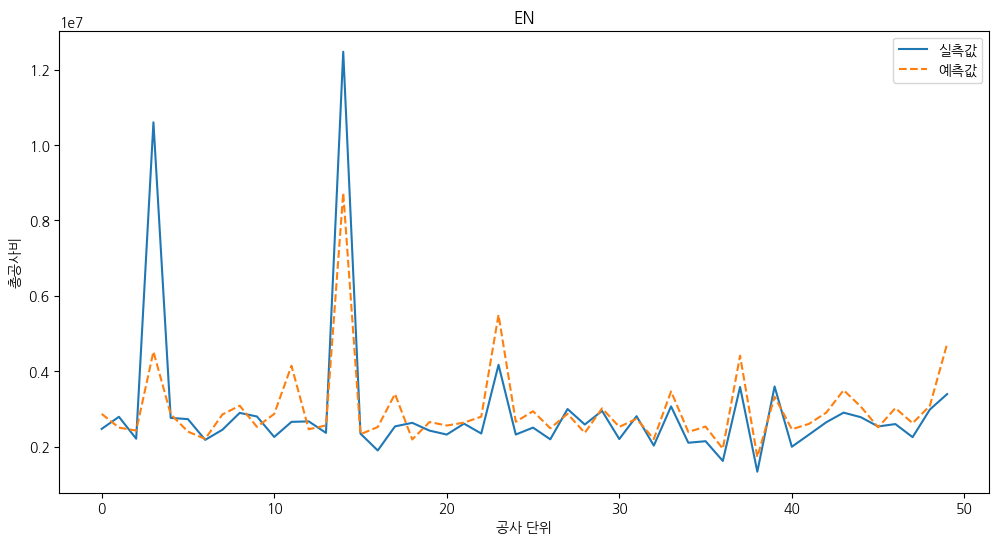

Evaluation: XGR
R2_SCORE: -0.030269, MAPE: 33.252243, MSE: 3662792580772.677734, RMSE: 1913842.360481, MAE: 1173766.551808


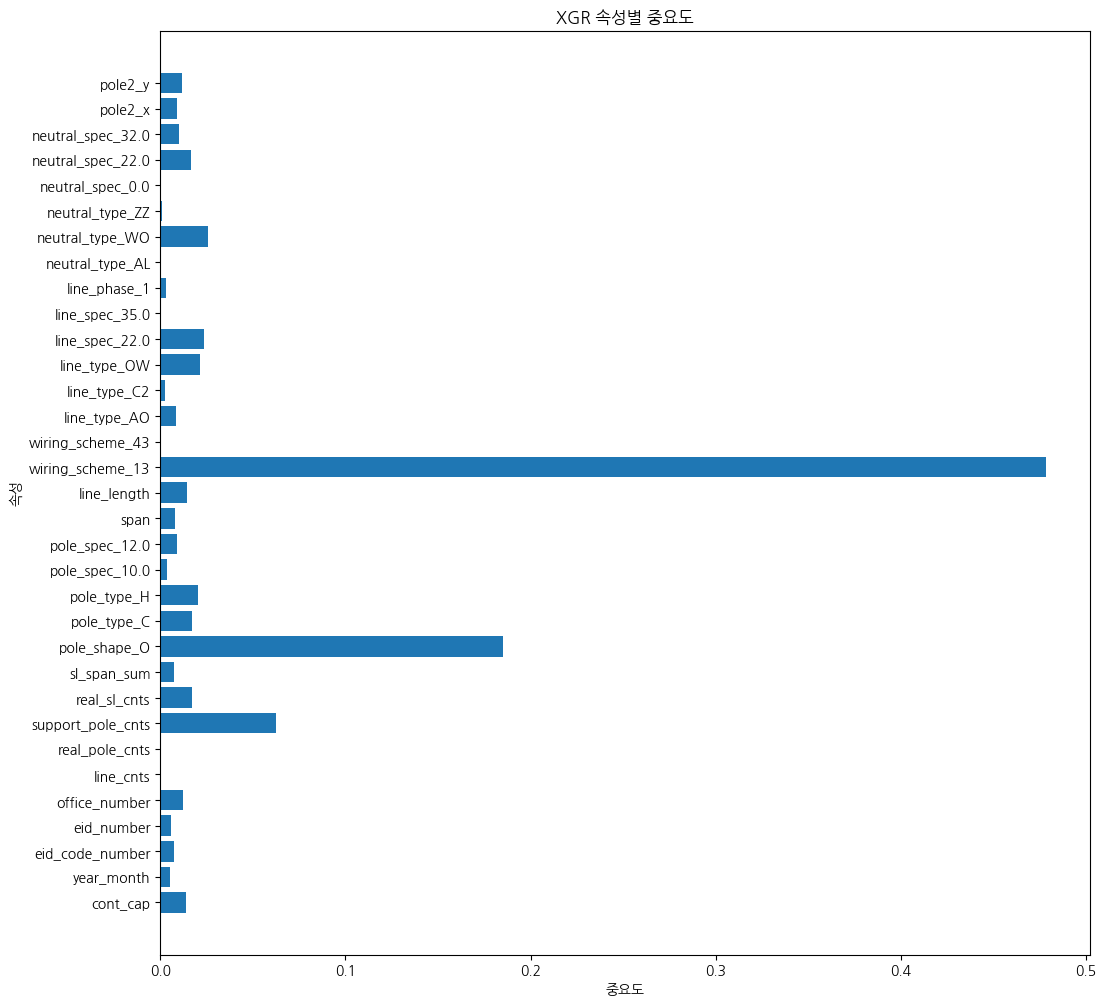

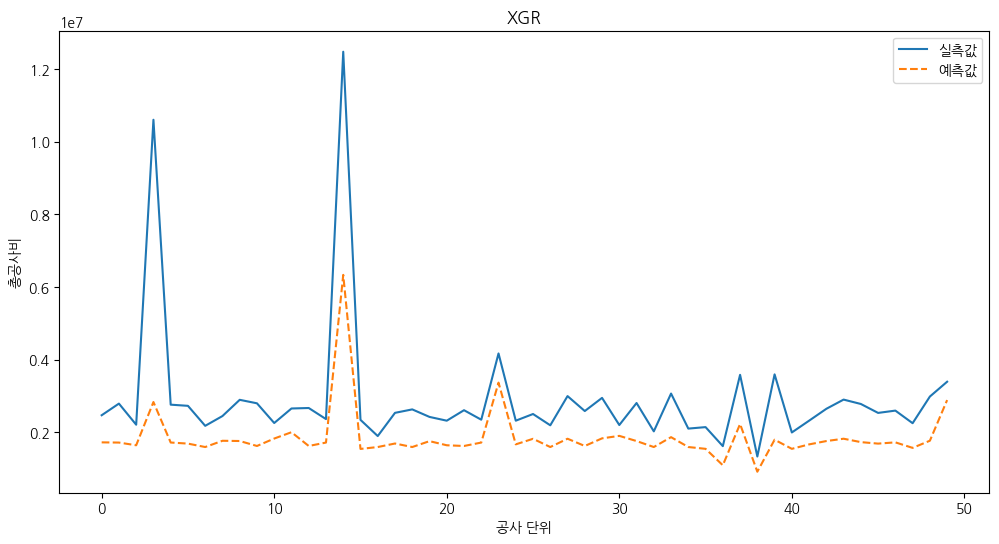

In [7]:
evaluation_values = []
model_names = []
column_names = ['r2score', 'mape', 'mse', 'rmse', 'mae']
for _model_key in ml_models.keys():
    model_fit_and_evaluation(_model_key, display_start=50, display_size=50)
    
df_evaluation = pd.DataFrame(
    evaluation_values, columns=column_names, index=model_names
)

In [8]:
df_evaluation

,r2score,mape,mse,rmse,mae
LIN,0.415187,0.201746,2.079117e+12,1.441914e+06,7.213379e+05
LASSO,0.415195,0.201768,2.079089e+12,1.441904e+06,7.214025e+05
RIDGE,0.415197,0.201764,2.079080e+12,1.441901e+06,7.213918e+05
KNR,0.281110,0.201961,2.555784e+12,1.598682e+06,7.583147e+05
DTR,-0.540820,0.270811,5.477893e+12,2.340490e+06,9.848821e+05
RFR,0.322867,0.192971,2.407328e+12,1.551557e+06,7.189465e+05
GBR,0.401693,0.189751,2.127089e+12,1.458454e+06,6.946174e+05
EN,0.406897,0.201812,2.108587e+12,1.452097e+06,7.188690e+05
XGR,-0.030269,0.332522,3.662793e+12,1.913842e+06,1.173767e+06
